# Cmpe 462 Project Phase-2
Group 18

2017400069 Erencan Uysal

2017400162 Muhammed Göktepe

There are two questions with different steps in this project. You need to place "*phase1_files*" which includes 3dshapes
and orientations, in the same directory with this notebook.

- Necessary imports:

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

### 1-a)
We were asked to visualize our features using t-SNE in 2D and 3D format. We used 2D format.
As you can see from the resulting image, t-sne devided our data to seperate clusters. In these clusters,
we can clearly see that colors are arranged in a certain order. yellow points which represent 0'th class is
inclined to be positioned on the lower left side of the clusters whereas, dark green points which represent 14'th class
are positioned on the upper right. However, all clusters contains different classes. So we can say that
t-sne could not successfully differentiate our data. So this data is not linearly seperable.

In [72]:
def read_img(size, directory):
    matrix = np.empty((size, 4096), int)
    for i in range(size):
        f = os.path.join(directory, str(i) + ".jpg")
        if os.path.isfile(f):
            pic = Image.open(f)
            gray_img = ImageOps.grayscale(pic)
            np_gray = np.array(gray_img)
            flat = np.reshape(np_gray, (1, 4096))
            matrix[i] = flat
    print("Matrix is created.")
    return matrix

def read_targets(file):
    orient = np.load(file)
    target = []
    oran = 30 / 7
    for k in orient:
        target.append(int((k / oran) + 7))
    return target

train_targets = read_targets('orientations_train.npy')
test_targets = read_targets('orientations_test.npy')

train_img_matrix = read_img(10000, "3dshapes_train")
test_img_matrix = read_img(1000, "3dshapes_test")

Matrix is created.
Matrix is created.


In [74]:
weight_dim = 50
pca_method = PCA(n_components=weight_dim)
pca_method.fit(train_img_matrix)
pca_train = pca_method.transform(train_img_matrix)
pca_test = pca_method.transform(test_img_matrix)

c:\users\erencan\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\erencan\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 10.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 498.887952
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.951416
[t-SNE] KL divergence after 300 iterations: 2.262202


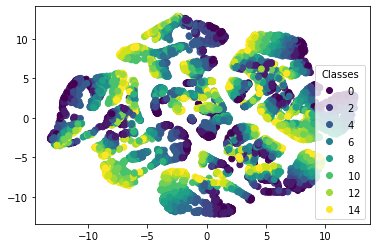

In [75]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_train)
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=train_targets)
plt.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
plt.show()

### 1-b)
We made a research for this question. In general, cross-entropy loss is used for gradient descent algorithm.
So we implemented our algorithm with using cross-entropy loss.

Cross Entropy Loss: $p_j=\frac{e^j}{\sum_{i}^{}e^i}$

$L = -\sum_{i}^{} y_i log(p_i)$

In order to derive the gradient of the cross-entropy loss function, we should calculate the first order
derivative of this loss function. The final result that we achieved is $\frac{\partial L}{\partial o}=p-y$ . We will
show all the steps in calculation:

$y_i$ is label.

$\frac{\partial L}{\partial o_k}=\frac{\partial }{o_k}(-log(p_k))=-\frac{\partial }{o_k}(log(p_k))
=-\frac{1}{p_k}\frac{\partial }{o_k}(p_k)$

$=-\frac{1}{p_k}\frac{\partial }{o_k}(\frac{e^{o_k}}{\sum_{i}^{}e^{o_i}})
=-\frac{1}{p_k}\frac{e^{o_k}\sum_{i}^{}e^{o_i}-(\frac{\partial }{o_k}\sum_{i}^{}e^{o_i})e^{o_k}}
{(\sum_{i}^{}e^{o_i})^{2}}$

$=-\frac{1}{p_k}(\frac{e^{o_k}}{\sum_{i}^{}e^{o_i}}-\frac{e^{o_k}\frac{\partial }
{o_k}\sum_{i}^{}e^{o_i}}{(\sum_{i}^{}e^{o_i}))^2})$

$=-\frac{1}{p_k}(p_k-\frac{e^{o_k}\frac{\partial }{o_k}\sum_{i}^{}e^{o_i}}{(\sum_{i}^{}e^{o_i}))^2})$

$o_k$ is the correct class. The gradient of it is:

$\frac{\partial L}{\partial o_k}=-\frac{1}{p_k}(p_k-\frac{(e^{o_k})^{2}}{(\sum_{i}^{}e^{o_i})^2})
=-\frac{1}{p_k}(p_k-(p_k)^2)=p_k-1$

$o_j$ is not a correct class. The gradient of it is:

$\frac{\partial L}{\partial o_j}=\frac{\partial }{o_j}(-log(p_k))=-\frac{\partial }{o_j}(log(p_k))
=-\frac{1}{p_k}\frac{\partial }{o_j}(p_k)$

$=-\frac{1}{p_k}\frac{\partial }{o_j}(\frac{e^{o_k}}{\sum_{i}^{}e^{o_i}})=-\frac{e^{o_k}}{p_k}\frac{\partial }{o_j}
(\frac{1}{\sum_{i}^{}e^{o_i}})$

$=-\frac{e^{o_k}}{p_k}(-1)\frac{1}{(\sum_{i}^{}e^{o_i})^2}\frac{\partial }{o_j}(\sum_{i}^{}e^{o_i})$

$=\frac{e^{o_k}}{p_k}\frac{1}{(\sum_{i}^{}e^{o_i})^2}e^{o_j}=\frac{1}{p_k}\frac{e^{o_k}}{\sum_{i}^{}e^{o_i}}
\frac{e^{o_j}}{\sum_{i}^{}e^{o_i}}$

$=\frac{1}{p_k}p_kp_j=p_j$

So we can find that:

$\frac{\partial L}{\partial o}=p-y$

ref: https://www.tutorialexample.com/understand-the-gradient-of-cross-entropy-loss-function-machine-learning-tutorial/

### 1-c and 1-d)

In this question, we tried to implement a five fold cross validation algorithm to our logistic regression
algorithm.
In the first step, we made a standardization on our data.

In [46]:
def standardize(X):
    for i in range(X.shape[1]):
        col = X[:, i]
        mean = col.mean()
        std = col.std()
        X[:, i] = (X[:, i] - mean) / (std + 1)
    return X

pca_train = standardize(pca_train)
pca_test = standardize(pca_test)

Then we defined the functions. As you can see, we used cross entropy loss and fullbatch gradient descent.

In [25]:
def accuracy(predictions, target):
    return np.mean(predictions == target) * 100

def multinomialLogReg(X, weights):
    pre_val = np.zeros((X.shape[0], 15))
    for i in range(X.shape[0]):
        pre_val[i] = (weights.dot(X[i].reshape(-1, 1))).reshape(-1)
    probabilities = np.zeros((pre_val.shape[0], 15))
    for i in range(pre_val.shape[0]):
        exp = np.exp(pre_val[i] - np.max(pre_val[i]))
        sumOfArr = np.sum(exp)
        probabilities[i] = exp / sumOfArr
    predictions = np.array([np.argmax(i) for i in probabilities])
    return probabilities, predictions

def crossEntropyLoss(probabilities, target):
    size = probabilities.shape[0]
    loss = 0
    for sample, i in zip(probabilities, target):
        loss += -np.log(sample[i])
    loss /= size
    return loss

def fullBatchGD(learning_rate, iterations, target, features, weights, threshold):
    loss_list = np.array([])
    accuracies = []
    for i in range(iterations):
        probabilities, predictions = multinomialLogReg(features, weights)  # Calculates probabilities for each possible outcome
        acc = accuracy(predictions, target)
        accuracies.append(acc)

        CELoss = crossEntropyLoss(probabilities, target)  # Calculates cross entropy loss for actual target and predictions
        loss_list = np.append(loss_list, CELoss)  # Adds the CELoss value for the iteration to loss_list
        probabilities[np.arange(features.shape[0]), target] -= 1  # Subtract 1 from the scores of the correct outcome
        grad_weight = probabilities.T.dot(features)  # gradient of loss w.r.t. weights
        update = learning_rate * grad_weight
        weights -= update

        if np.abs(update).max() < threshold or acc == 100:
            break

    plt.plot(range(len(loss_list)), loss_list)
    plt.title("step size: " + str(learning_rate))
    plt.show()
    return weights, loss_list

After all these initializations, we randomly seperated our train set to five parts and started to try different step sizes.
As you can see in the below figures, 0.1, 0.02 and 0.004 are not good for step sizes since they made
zigzags in loss functions. But in 0.0008, we reached a more smooth loss values graph. So we decided to use this values as
our step size.

![title](fig01.png)
![title](fig002.png)
![title](fig0004.png)
![title](fig00008.png)
![title](fig000016.png)

--------------------------------------iteration  0 ----------------------------------------------------


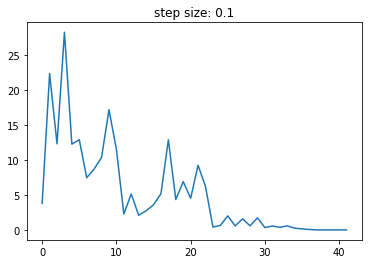

train acc 100.0
test acc 99.5
--------------------------------------iteration  1 ----------------------------------------------------


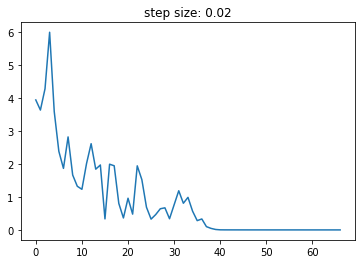

train acc 100.0
test acc 99.15
--------------------------------------iteration  2 ----------------------------------------------------


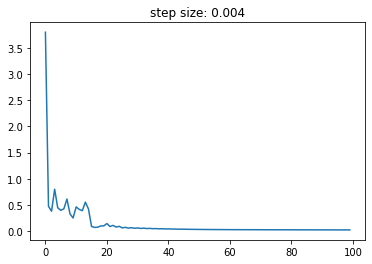

train acc 99.95
test acc 100.0
--------------------------------------iteration  3 ----------------------------------------------------


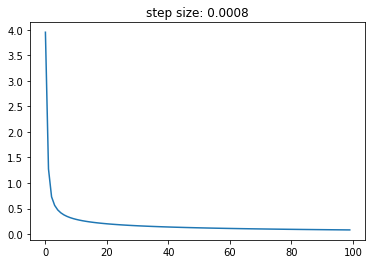

train acc 99.8375
test acc 99.5
--------------------------------------iteration  4 ----------------------------------------------------


In [ ]:
def five_fold(train, target, weight_dim):
    train, target = shuffle(train, target)
    subArray = []
    sub_targets = []
    len_tr = int(len(train)/5)
    weights = np.random.rand(15, weight_dim)
    step_size = 0.1
    for i in range(5):
        subArray.append(train[len_tr * i: len_tr * (i + 1)])
        sub_targets.append(target[len_tr * i: len_tr * (i + 1)])
    for i in range(5):
        print("--------------------------------------iteration ", i, "----------------------------------------------------")
        weights = np.random.rand(15, weight_dim)
        test = subArray[i]
        test_targets = sub_targets[i]
        train = np.vstack(subArray[:i] + subArray[i + 1:])
        train_targets = np.vstack(sub_targets[:i] + sub_targets[i + 1:]).flatten()

        weights, loss_list = fullBatchGD(step_size, 100, train_targets, train, weights, 1e-3)

        trainProb, trainPredictions = multinomialLogReg(train, weights)
        acc = accuracy(trainPredictions, train_targets)
        print("train acc", acc)

        testProb, testPredictions = multinomialLogReg(test, weights)
        acc = accuracy(testPredictions, test_targets)
        print("test acc", acc)
        step_size = step_size/5
    print("hello")
    return weights

weights = five_fold(pca_train, train_targets, weight_dim)
testProb, testPredictions = multinomialLogReg(pca_test, weights)
acc = accuracy(testPredictions, test_targets)
print(acc)

### 1-f)
We did not encountered with neither overfitting nor underfitting, because we selected number of dimensions in pca correctly.
When we tried the pca with 10 dimensions, we encountered with underfitting. Because our model could not reach proper weights with using just 10 dimensions.
- If you want to test our hypothesis, you can change the weight_dim variable in the second code cell, and try all of the steps according to it.

### 1-h)
As you can see in the below cell, weight values are variable between negative and positive values. When we examine the values
of weight matrix, we can see that some indexes has huge values compared to others. For example 4'th feature for the first class
has 3.69 as weight. This is really big compared to other values which generaly are between 0 and 1. This situation
shows us the 4'th feature is more important for the first class than others.

In [ ]:
print(weights)

### 1-g)
We tried to implement L1 norm regularization with soft thresholding. "L1 regularization works by adding a term to the error function used by the training algorithm. The additional term penalizes large-magnitude weight values."
We used a variable named lamda as this term. Basically we used lamda\*learning_rate as a threshold factor.
If we encountered a weight value whose absolute value is smaller than this threshold, we set this weight value to zero.
In this way, we created a sparse matrix (containing lots of zeros). If weight value is not smaller than threshold, we calculated
a new weight with subtracting learning_rate\*gradient + learning_rate\*lamda from initial value of the weight.
- If you want to see the outcome of this change, you should run below cell, then run the five-fold cell.
- As a result, we decided to use 0.001 as our lamda value. Because when we used a bigger value, we encountered zigzags in
the loss function graph.

ref: https://visualstudiomagazine.com/articles/2017/12/05/neural-network-regularization.aspx

In [35]:
def fullBatchGD(learning_rate, iterations, target, features, weights, threshold):
    lamda = 0.0001
    loss_list = np.array([])
    accuracies = []
    for i in range(iterations):
        probabilities, predictions = multinomialLogReg(features, weights)  # Calculates probabilities for each possible outcome
        acc = accuracy(predictions, target)
        accuracies.append(acc)

        CELoss = crossEntropyLoss(probabilities, target)  # Calculates cross entropy loss for actual target and predictions
        loss_list = np.append(loss_list, CELoss)  # Adds the CELoss value for the iteration to loss_list
        probabilities[np.arange(features.shape[0]), target] -= 1  # Subtract 1 from the scores of the correct outcome
        grad_weight = probabilities.T.dot(features)  # gradient of loss w.r.t. weights
        update = learning_rate * grad_weight
        for i in range(len(weights)):
            for k in range(len(weights[i])):
                if abs(weights[i][k])<learning_rate*lamda:
                    weights[i][k]=0
                else:
                    weights[i][k] -= (update[i][k] + learning_rate*lamda)


        if np.abs(update).max() < threshold or acc == 100:
            break

    plt.plot(range(len(loss_list)), loss_list)
    plt.title("step size: " + str(learning_rate))
    plt.show()
    return weights, loss_list

### 2-a)
 In this question, we implemented the naive bayes algorithm with using scikitlearn library.
 As you can see from the result, test accuracy is comparably poor relative to logistic regression.

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
scaler = MinMaxScaler()
scaler.fit(pca_train)
X_train = scaler.transform(pca_train)
scaler.fit(pca_test)
X_test = scaler.transform(pca_test)
clf = GaussianNB()
clf.fit(X_train,train_targets)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc_train= accuracy(pred_train,train_targets)
acc_test= accuracy(pred_test,test_targets)
print("test accuracy: ",acc_test,"    train accuracy: ",acc_train)

test accuracy:  70.5     train accuracy:  97.03


### 2-b)
Naive bayes assumes conditional independence. Conditional probability can be stated as ${\displaystyle P(A\mid B,C)=P(A\mid C)}$ However, if our
data is not conditionally independent, naive bayes could fail in predicting. Naive bayes resulted poorly relative to logistic
regression. We can basically say that our data could be conditionally dependent. But when we examine the images in the dataset,
we can see that there are not any dependence between colors and shapes. In fact there are different colors and shapes combinations.
So we can say that our data is conditionally independent.

### 2-c)
With conditional independence the numbers of parameters we need to estimate is $2d(k-1)$ so we will get $2*100(15-1)=2800$

Without conditional independence the numbers of parameters we need to estimate is $2(k^d-1)$ so we will get $2((15)^ {100}-1)=soooo big number$
